In [1]:
import random
import re
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
import sys
from mnist import MNIST
mndata = MNIST('./2')

In [2]:
pokoleniya=100
population_size=200
chromosome_bodyoncetoldme=784 # длина хромосомы
selection_count=100 # сколько особей выбирается в селекции
mutation_kek=0.05 # шанс мутации, от 0 до 1
log=False # отображение данных после каждой операции

In [3]:
images_train, labels_train = mndata.load_training()
train_fist=mndata.process_images_to_numpy(images_train)
train_ass=mndata.process_labels(labels_train)

In [4]:
train_filter = []
for element in train_ass:
  if (element==0)|(element==1):
    train_filter.append(True)
  else:
    train_filter.append(False)

x=np.around(train_fist/255)[train_filter] # нейроны
y=np.array(train_ass)[train_filter]

print(y)

[0 1 1 ... 1 0 1]


In [5]:
def f(v): # функция активации
    if(v>0): return 1
    else: return 0

activ=np.vectorize(f)

In [7]:
def generate_population(size):
    result=[]
    for kek in range(size):
        w=[]
        for i in range(chromosome_bodyoncetoldme):
            w.append(random.uniform(-1, 1))
        result.append(w)
    return result

# print(generate_population(1)[0])

In [158]:
def predict(vector):
    result=0
    for i in range(2):
        if(vector==1): result=i
    return result

# функция приспособленности
def prisposobl(w):
    # w=np.array(w).reshape(len(w),1)
    y1=x@w
    y1=activ(y1)
    right=0
    for i in range(len(x)):
        if(predict(y1[i])==y[i]): right+=1

    total=len(x)
    accyracy=right/total
    return accyracy # сколько правильных ответов

sex=generate_population(1)[0]
# print(sex)
prisposobl(sex)

0.5480457954994078

In [159]:
def print_population(data):
    df=pd.DataFrame(data)
    print(df)

# худший результат в популяции
def population_best_result(data):
    penis=[]
    for i in data:
        penis.append((prisposobl(i), i))
    best_shrek=sorted(penis, key=itemgetter(0), reverse=True)[0]

    return (best_shrek)

# лучший результат в популяции
def population_max_result(data):
    penis=[]
    for i in data:
        penis.append((prisposobl(i), i))
    max_shrek=sorted(penis, key=itemgetter(0))[0]

    return (max_shrek)

# средний результат в популяции
def population_average_result(data):
    penis=[]
    for i in data:
        penis.append((prisposobl(i)))
    result=np.mean(penis)

    return result

# sex=generate_population(5)
# print(population_best_result(sex))
# print(population_max_result(sex))
# print(population_average_result(sex))

In [160]:

def roulette_selection(data, sel_count):
    pool=[]
    sectors=[]
    wheel=[]
    f_sum=0

    for chromosome in data:
        f=prisposobl(chromosome)
        f_sum+=f
    for chromosome in data:
        f=prisposobl(chromosome)
        v=f/f_sum*100
        sectors.append((v, chromosome))
    point=0
    for i in range(0,len(sectors)-1):
        wheel.append((sectors[i][1], (point, point+sectors[i][0])))
        point+=sectors[i][0]
        if(i==len(sectors)-2): 
            wheel.append((sectors[i][1], (point, 100)))
    for i in range(sel_count):
        choice=random.randint(0,100)
        for j in wheel:
            if((choice>=j[1][0]) and (choice<=j[1][1])): 
                pool.append(j[0])
                break
    
    return pool

# roulette_selection(generate_population(10), 5)

In [161]:

def simple_selection(data, sel_count):
    pool=[]
    adaptation=[]
    for chromosome in data:
        adaptation.append((prisposobl(chromosome), chromosome))
    adaptation=sorted(adaptation, key=itemgetter(0), reverse=True)
    for i in range(0, sel_count):
        pool.append(adaptation[i][1])

    return pool

# simple_selection(generate_population(10), 5)

In [162]:

def permutation_crossover(parent1, parent2, chromo_length):
    chromo_length-=2
    par1_start=parent1[0]
    par2_start=parent2[0]
    par1_end=parent1[len(parent1)-1]
    par2_end=parent2[len(parent1)-1]
    parent1=parent1[1:len(parent1)-1]
    parent2=parent2[1:len(parent2)-1]

    pos1=random.randint(1, chromo_length//2-1)
    pos2=random.randint(pos1+1, chromo_length-1)
    middle=parent1[pos1:pos2+1]
    shrek=[]
    for i in parent2:
        if not (i in middle): shrek.append(i)
    child1=[]
    for i in range(0, chromo_length-1):
        if(i<pos1): child1.append(shrek.pop(0))
        elif(i==pos1): child1+=middle
        elif(i==pos2): child1.append(shrek.pop(0))
        elif(i>pos2) and (len(shrek)>0): child1.append(shrek.pop(0))
        elif(i>pos2) and (len(shrek)==0): child1.append(parent2[i])
    
    middle=parent2[pos1:pos2+1]
    shrek=[]
    for i in parent1:
        if not (i in middle): shrek.append(i)
    child2=[]
    for i in range(0, chromo_length-1):
        if(i<pos1): child2.append(shrek.pop(0))
        elif(i==pos1): child2+=middle
        elif(i==pos2): child2.append(shrek.pop(0))
        elif(i>pos2) and (len(shrek)>0): child2.append(shrek.pop(0))
        elif(i>pos2) and (len(shrek)==0): child2.append(parent1[i])

    child1.insert(0, par1_start)
    child1.append(par1_end)
    child2.insert(0, par2_start)
    child2.append(par2_end)
    return child1, child2

permutation_crossover([1,2,3,4,5,6,7,8], [8,7,6,5,4,3,2,1], 8)

([1, 7, 3, 4, 6, 5, 2, 8], [8, 2, 6, 5, 3, 4, 7, 1])

In [163]:

def two_point_crossover(parent1, parent2, chromo_length):
    chromo_length-=2
    par1_start=parent1[0]
    par2_start=parent2[0]
    par1_end=parent1[len(parent1)-1]
    par2_end=parent2[len(parent1)-1]
    parent1=parent1[1:len(parent1)-1]
    parent2=parent2[1:len(parent2)-1]

    pos1=random.randint(1, chromo_length//2-1)
    pos2=random.randint(pos1+1, chromo_length-1)

    child1=parent1[0:pos1]+parent2[pos1-1:pos2]+parent1[pos2+1:chromo_length]
    child2=parent2[0:pos1]+parent1[pos1-1:pos2]+parent2[pos2+1:chromo_length]

    child1.insert(0, par1_start)
    child1.append(par1_end)
    child2.insert(0, par2_start)
    child2.append(par2_end)
    return child1, child2

two_point_crossover([1,2,3,4,5,6,7,8], [8,7,6,5,4,3,2,1], 8)

([1, 2, 3, 6, 5, 4, 7, 8], [8, 7, 6, 3, 4, 5, 2, 1])

In [164]:
def mutation(chromosome, chrom_length):
    result=chromosome
    choice=random.random()

    if(choice-mutation_kek<=0):
        pos1=random.randint(0, chrom_length//2-1)
        pos2=random.randint(pos1+1, chrom_length-1)
        shrek=result[pos1:pos2+1]
        for i in range(len(shrek)):
            shrek[i]=random.random()
        result[pos1:pos2+1]=shrek

    return result

mutation([1,2,3,4,5,6,7,8], 8)

[1, 2, 3, 4, 5, 6, 7, 8]

## обучение

In [168]:
average_results=[]
max_results=[]
min_results=[]
best=[]

elite_size=10

if(log):
    current_population=generate_population(population_size)
    print("первая популяция создана:")
    print_population(current_population)
    print("Лучшее значение приспособленности:")
    print(population_best_result(current_population))

    for pok in range(pokoleniya):
        print(f"Поколение {pok+1}")
        if(elite_size>0): 
            elite=simple_selection(current_population, elite_size)
        current_population=roulette_selection(current_population, selection_count) # Здесь менять селекцию
        print("селекция произведена")
        print("результат селекции:")
        print_population(current_population)
        print("Лучшее значение приспособленности после селекции:")
        print(population_best_result(current_population))
        
        for i in range((population_size-selection_count-elite_size)//2):
            parent1=random.randint(0, selection_count-1)
            parent2=random.randint(0, selection_count-1)
            while(parent2==parent1): parent2=random.randint(0, selection_count-1)
            children=permutation_crossover(current_population[parent1], current_population[parent2], chromosome_bodyoncetoldme) # Здесь менять скрещивание
            current_population.append(children[0])
            current_population.append(children[1])
        if(elite_size>0): 
            current_population+=elite
        if(len(current_population)<population_size): 
            current_population.append(generate_population(1)[0])
        print("скрещивание произведено")
        print("результат скрещивания:")
        print_population(current_population)
        print("Лучшее значение приспособленности после скрещивания:")
        print(population_best_result(current_population))

        temp=current_population
        for i_chel in range(0, len(current_population)-1):
            temp[i_chel]=mutation(current_population[i_chel], chromosome_bodyoncetoldme)
        current_population=temp

        if(elite_size>0): 
            current_population+=elite
        if(len(current_population)<population_size): 
            current_population.append(generate_population(1)[0])
        print("мутация произведена")
        print("результат мутации:")
        print_population(current_population)
        print("Лучшее значение приспособленности после мутации:")
        sas1=population_best_result(current_population)
        print(sas1)
        min_results.append(sas1[0])
        max_results.append(population_max_result(current_population)[0])
        average_results.append(population_average_result(current_population))
        best=sas1[1]

        print(f"Конец {pok+1} поколения")

In [169]:
if(not log):
    current_population=generate_population(population_size)

    for pok in range(pokoleniya):
        if(elite_size>0): 
            elite=simple_selection(current_population, elite_size)
        current_population=roulette_selection(current_population, selection_count) # Здесь менять селекцию
        
        for i in range((population_size-selection_count-elite_size)//2):
            parent1=random.randint(0, selection_count-1)
            parent2=random.randint(0, selection_count-1)
            while(parent2==parent1): parent2=random.randint(0, selection_count-1)
            children=permutation_crossover(current_population[parent1], current_population[parent2], chromosome_bodyoncetoldme) # Здесь менять скрещивание
            current_population.append(children[0])
            current_population.append(children[1])

        temp=current_population
        for i_chel in range(0, len(current_population)-1):
            temp[i_chel]=mutation(current_population[i_chel], chromosome_bodyoncetoldme)
        current_population=temp

        if(elite_size>0): 
            current_population+=elite
        if(len(current_population)<population_size): 
            current_population.append(generate_population(1)[0])

        sas1=population_best_result(current_population)
        min_results.append(sas1[0])
        max_results.append(population_max_result(current_population)[0])
        average_results.append(population_average_result(current_population))
        best=sas1[1]
    print(f"Лучший результат в конце {pokoleniya} поколения:")
    print(min_results[pokoleniya-1], best)

Лучший результат в конце 100 поколения:
0.9904461113304383 [0.13120895432774193, -0.024211694530406058, 0.045093512064503294, 0.9598990862125363, -0.7968206446896249, -0.5304809048490224, 0.3509750651515089, 0.3979921584255137, -0.8005267322860485, 0.10619753339000537, 0.7759493253278762, 0.5127202365773327, 0.5067034983591481, -0.6709208550616015, -0.1027313188671366, -0.5417202433575061, -0.5954326144007114, 0.9074163767439822, -0.22196868525994828, -0.07151129367906961, -0.26261648388339576, -0.6904460602955151, -0.6867421758557535, 0.12167791304792286, -0.7322069190842644, 0.49686444322290124, 0.7121092628217642, 0.3210799837400875, -0.8752990682142967, 0.35708839240643653, -0.21088419882494303, 0.9446540748999979, -0.3501355899014198, -0.36819087709980325, 0.09306273780922125, 0.6339097774469995, 0.8512806522231611, 0.3026485189156066, 0.26494080581364843, 0.5612297587422306, -0.5009121006433639, -0.7867548494166188, 0.9990662730539572, -0.5599193870171264, -0.296309428569167, 0.1

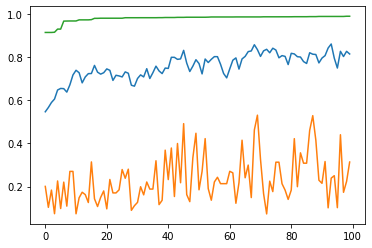

In [170]:
# график приспособленности по поколениям
def draw_progress(average_results, max_results, min_results, pok_count):
    x=range(pok_count)
    y1=average_results
    y2=max_results
    y3=min_results
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.plot(x,y3)
    plt.show()

draw_progress(average_results, max_results, min_results, pokoleniya)